## Introduction:

Right around the time "Star Wars: The Force Awakens" came out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wanted to know which Star Wars film was their favorite - I also became curious. So I am going to explore the survey myself, clean it up a bit, and see what I can find.

In [199]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [94]:
# reading in the data
df = pd.read_csv("StarWars.csv", encoding = 'ISO-8859-1')
df.shape

(1187, 38)

In [95]:
# preview
df.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [89]:
# look at the variables
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
 

RepondentID is supposed to have a value for every respondent, but some of the rows are missing values. I'll filter the data for only non-null RespondentID values.

In [96]:
# only non-null values
df = df[pd.notnull(df.iloc[:,0])]
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [20]:
df.shape

(1186, 38)

The first two questions (columns) have values that are in string format. It's easier to do analysis on boolean values, so I'll convert them to True and False values.

In [97]:
df.iloc[:, 1].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [98]:
df.iloc[:, 2].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [99]:
# using map function
df.iloc[:, 1] = df.iloc[:, 1].map({"Yes": True, 
                      "No": False})

In [100]:
df.iloc[:, 2] = df.iloc[:, 2].map({"Yes": True,
                                  "No": False})

In [101]:
# preview 
df.iloc[:, [1,2]].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True


In [102]:
df.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

I'll do the same thing I did with these columns as I did with the first two. Afterwards, I will rename them to make the names more descriptive.

In [103]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in df.columns[3:9]:
    df[col] = df[col].map(movie_mapping)

In [104]:
df.iloc[:, 3:10].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
1,True,True,True,True,True,True,3
2,False,False,False,False,False,False,NaN
3,True,True,True,False,False,False,1
4,True,True,True,True,True,True,5
5,True,True,True,True,True,True,5


In [105]:
df = df.rename(columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

In [106]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [107]:
df.iloc[:, 9:15].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


These columns need to be converted to a numeric type and renamed.

In [108]:
df.iloc[:, 9:15] = df.iloc[:, 9:15].astype(float)

In [109]:
df.iloc[:, 9:15].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [110]:
# renaming
df = df.rename(columns = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
"Unnamed: 10": "ranking_2",
"Unnamed: 11": "ranking_3",
"Unnamed: 12": "ranking_4",
"Unnamed: 13": "ranking_5",
"Unnamed: 14": "ranking_6"})

In [111]:
df.iloc[:, 9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


Now that we've cleaned up the ranking columns, we can find the highest-ranked movie. Since the ranking columns have values of 1-6 (1 being the best rank, 6 being the worst rank), I'll take the average of each column and compare the movies.

In [112]:
df.iloc[:, 9:15].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

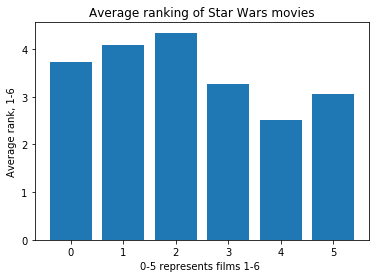

In [113]:
%matplotlib inline
plt.bar(range(6), df.iloc[:, 9:15].mean())
plt.title("Average ranking of Star Wars movies")
plt.xlabel("0-5 represents films 1-6 ")
plt.ylabel("Average rank, 1-6")
plt.show()

### Findings:

- The 5th movie ("Star Wars: Episode V The Empire Strikes Back") was ranked as their favorite movie. It had an average rank of 2.5 (remember lower is better).
- The 3rd movie ("Star Wars: Episode III  Revenge of the Sith") was their least favorite movie. It had an average rank of 4.3.
- It seems like respondents prefer the "original" films (4,5,6) to the newer ones (1,2,3).


I now want to explore which movies the respondents watched most. I'll take the sum of each column and compare their totals to find the most watched movie.

In [114]:
# taking the sum
df.iloc[:, 3:9].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

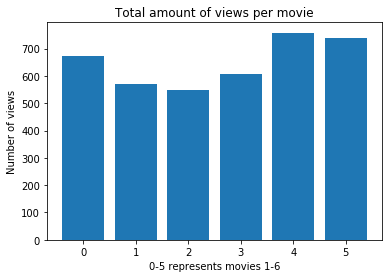

In [115]:
plt.bar(range(6), df.iloc[:, 3:9].sum())
plt.title("Total amount of views per movie")
plt.ylabel("Number of views")
plt.xlabel("0-5 represents movies 1-6")
plt.show()

### Findings:

- The 5th movie ("Star Wars: Episode V The Empire Strikes Back") had the most views. 758 of the respondents watched it.
- The 3rd movie ("Star Wars: Episode III Revenge of the Sith") had the lowest views. 550 of the respondents watched it.
- These results corroborate what we found with the rankings: people liked the original films (4,5,6) better.

### Exploring gender

In order to explore the ranking and views I'll filter the dataframe by gender, creating two seperate dataframes.

In [82]:
males = df[df["Gender"] == "Male"]
females = df[df["Gender"] == "Female"]

In [83]:
males.iloc[:, 9:15].mean()

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

In [84]:
females.iloc[:, 9:15].mean()

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

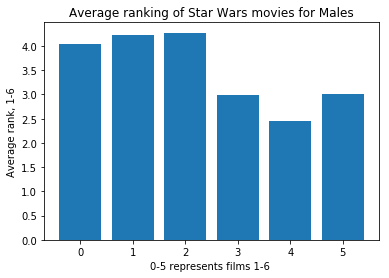

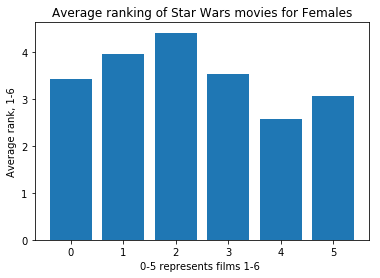

In [87]:
plt.bar(range(6), males.iloc[:, 9:15].mean())
plt.title("Average ranking of Star Wars movies for Males")
plt.xlabel("0-5 represents films 1-6 ")
plt.ylabel("Average rank, 1-6")
plt.show()

plt.bar(range(6), females.iloc[:, 9:15].mean())
plt.title("Average ranking of Star Wars movies for Females")
plt.xlabel("0-5 represents films 1-6 ")
plt.ylabel("Average rank, 1-6")
plt.show()

In [85]:
males.iloc[:, 3:9].sum()

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

In [86]:
females.iloc[:, 3:9].sum()

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

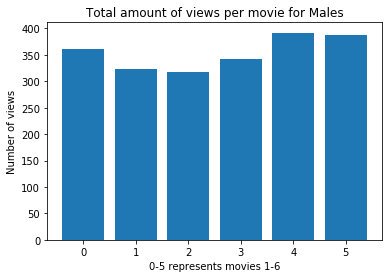

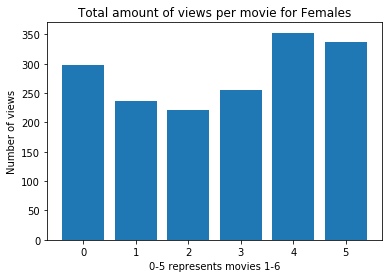

In [88]:
plt.bar(range(6), males.iloc[:, 3:9].sum())
plt.title("Total amount of views per movie for Males")
plt.ylabel("Number of views")
plt.xlabel("0-5 represents movies 1-6")
plt.show()

plt.bar(range(6), females.iloc[:, 3:9].sum())
plt.title("Total amount of views per movie for Females")
plt.ylabel("Number of views")
plt.xlabel("0-5 represents movies 1-6")
plt.show()

### Findings:

- Both males and females prefered the original films to the newer ones. But males ranked the original films a little lower (dont forget lower is better) than the females did.
- Both males and females watched the original films more, but females watched films 1, 2, and 3 less than the males did.

Now, lets explore age, education, and Star Wars v. Star Trek fans.

In [201]:
df.iloc[:, 34:].describe(include = 'all')

,Age,Household Income,Education,Location (Census Region)
count,1046,858,1036,1043
unique,4,5,5,9
top,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,291,298,328,181


In [123]:
df.iloc[:, 34].value_counts()

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

### Exploring age

I want to explore the ratings and views across age groups. Since the first film came out in 1977, and today is 2018, the movie came out 38 years ago. That means people 38 and older were alive when the first movie came out. So, what I'll do is create a dataframe for 44 and older and another dataframe for 18-29. I chose 18-44 to combine the younger generation - some of which didn't grow up wathcing Star Wars; and 44 and older to combine anyone old enough to have grow up watching the movies.

In [134]:
between_18_and_44 = df[(df["Age"] == '18-29') | (df["Age"] == '30-44')]
older_than_44 = df[(df["Age"] != '18-29') | (df["Age"] != '30-44')]
between_18_and_44.iloc[:, 3:9].sum()

seen_1    335
seen_2    306
seen_3    297
seen_4    328
seen_5    357
seen_6    357
dtype: int64

In [188]:
older_than_44.iloc[:, 3:9].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

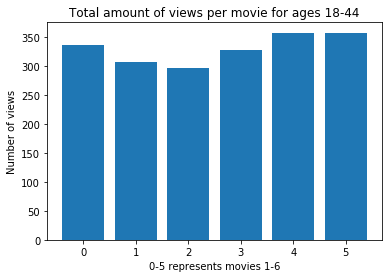

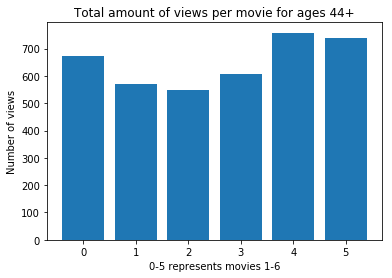

In [192]:
plt.bar(range(6), between_18_and_44.iloc[:, 3:9].sum())
plt.title("Total amount of views per movie for ages 18-44")
plt.ylabel("Number of views")
plt.xlabel("0-5 represents movies 1-6")
plt.show()

plt.bar(range(6), older_than_44.iloc[:, 3:9].sum())
plt.title("Total amount of views per movie for ages 44+")
plt.ylabel("Number of views")
plt.xlabel("0-5 represents movies 1-6")
plt.show()

In [189]:
between_18_and_44.iloc[:, 9:15].mean()

ranking_1    4.232558
ranking_2    4.211886
ranking_3    4.238342
ranking_4    2.961240
ranking_5    2.449612
ranking_6    2.901809
dtype: float64

In [190]:
older_than_44.iloc[:, 9:15].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [139]:
older_than_44.shape, between_18_and_44.shape

((1186, 38), (486, 38))

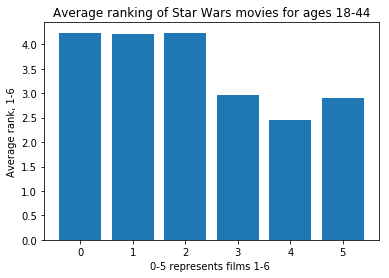

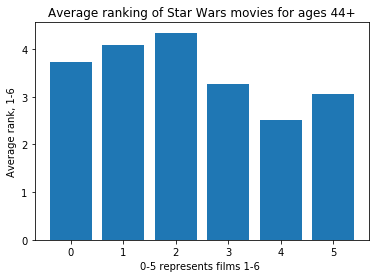

In [191]:
plt.bar(range(6), between_18_and_44.iloc[:, 9:15].mean())
plt.title("Average ranking of Star Wars movies for ages 18-44")
plt.xlabel("0-5 represents films 1-6 ")
plt.ylabel("Average rank, 1-6")
plt.show()

plt.bar(range(6), older_than_44.iloc[:, 9:15].mean())
plt.title("Average ranking of Star Wars movies for ages 44+")
plt.xlabel("0-5 represents films 1-6 ")
plt.ylabel("Average rank, 1-6")
plt.show()

### Findings:

- There isnt much of a difference between the rankings given by group 1 (between_18_and_44) and group 2 (older_than_44). They both ranked the original films better.
- The older group had more views, but this is probably due to the older group having more than twice the amount of respondents than the younger group (486 young/1186 old).
- There isn't a big difference between the groups. They both ranked the 5th movie as the best, and watched the 5th movie the most. 

### Exploring education

Let's see if there are any differences across education groups. I decided to seperate them into "no_college" and "college_and_up".

In [152]:
df["Education"].value_counts()


Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [158]:
college_and_up = df[(df["Education"] != 'High school degree')|(df["Education"] != "Less than high school degree")]
college_and_up.shape

(1186, 38)

In [160]:
no_college = df[(df["Education"] == 'High school degree')|(df["Education"] == "Less than high school degree")]
no_college.shape

(112, 38)

In [161]:
no_college.iloc[:, 9:15].mean()

ranking_1    3.851351
ranking_2    3.810811
ranking_3    4.108108
ranking_4    3.189189
ranking_5    2.797297
ranking_6    3.243243
dtype: float64

In [162]:
college_and_up.iloc[:, 9:15].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

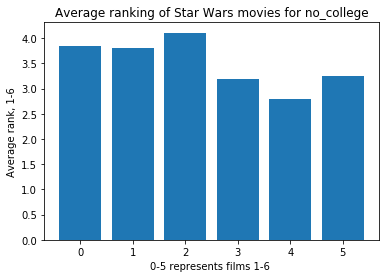

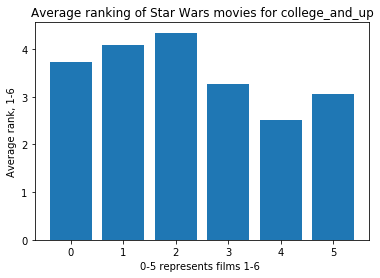

In [195]:
plt.bar(range(6), no_college.iloc[:, 9:15].mean())
plt.title("Average ranking of Star Wars movies for no_college")
plt.xlabel("0-5 represents films 1-6 ")
plt.ylabel("Average rank, 1-6")
plt.show()

plt.bar(range(6), college_and_up.iloc[:, 9:15].mean())
plt.title("Average ranking of Star Wars movies for college_and_up")
plt.xlabel("0-5 represents films 1-6 ")
plt.ylabel("Average rank, 1-6")
plt.show()

In [164]:
no_college.iloc[:, 3:9].sum()

seen_1    60
seen_2    51
seen_3    51
seen_4    56
seen_5    64
seen_6    63
dtype: int64

In [165]:
college_and_up.iloc[:, 3:9].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

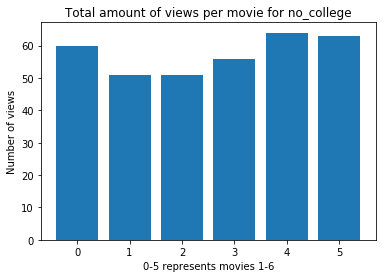

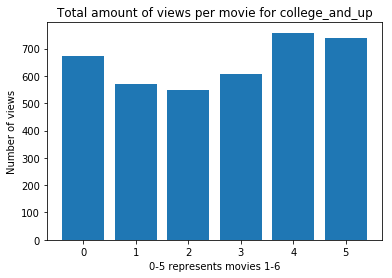

In [196]:
plt.bar(range(6), no_college.iloc[:, 3:9].sum())
plt.title("Total amount of views per movie for no_college")
plt.ylabel("Number of views")
plt.xlabel("0-5 represents movies 1-6")
plt.show()

plt.bar(range(6), college_and_up.iloc[:, 3:9].sum())
plt.title("Total amount of views per movie for college_and_up")
plt.ylabel("Number of views")
plt.xlabel("0-5 represents movies 1-6")
plt.show()

### Findings:

- Education doesnt make much of a difference. Both group 1 (no_college) and group 2 (college_and_up) liked the 5th movie best. 

### Exploring Star Wars and Star Trek fans

Going to clean the columns first then split them into two groups.

In [175]:
df.iloc[:, 31] = df.iloc[:, 31].map({"Yes": True,
                     "No": False})

df.iloc[:, 32] = df.iloc[:, 32].map({"Yes": True,
                                    "No": False})

In [176]:
df.iloc[:, 31:33].head()

,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?
1,False,False
2,NaN,True
3,NaN,False
4,NaN,True
5,False,False


In [178]:
star_wars_fans = df[df.iloc[:, 31] == True]
star_trek_fans = df[df.iloc[:, 32] == True]

In [182]:
star_wars_fans.shape[0], star_trek_fans.shape[0]

(99, 427)

In [184]:
star_wars_fans.iloc[:, 9:15].mean()

ranking_1    4.303030
ranking_2    4.262626
ranking_3    4.111111
ranking_4    2.989899
ranking_5    2.343434
ranking_6    2.989899
dtype: float64

In [185]:
star_trek_fans.iloc[:, 9:15].mean()

ranking_1    3.968675
ranking_2    4.255422
ranking_3    4.403382
ranking_4    3.110843
ranking_5    2.407229
ranking_6    2.850602
dtype: float64

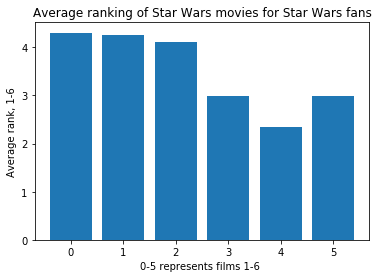

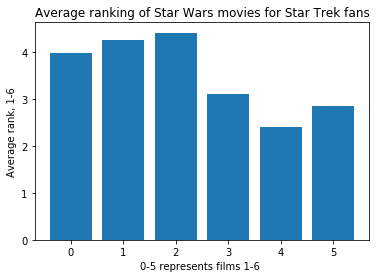

In [198]:
plt.bar(range(6), star_wars_fans.iloc[:, 9:15].mean())
plt.title("Average ranking of Star Wars movies for Star Wars fans")
plt.xlabel("0-5 represents films 1-6 ")
plt.ylabel("Average rank, 1-6")
plt.show()

plt.bar(range(6), star_trek_fans.iloc[:, 9:15].mean())
plt.title("Average ranking of Star Wars movies for Star Trek fans")
plt.xlabel("0-5 represents films 1-6 ")
plt.ylabel("Average rank, 1-6")
plt.show()

In [186]:
star_wars_fans.iloc[:, 3:9].sum()

seen_1    93
seen_2    90
seen_3    90
seen_4    88
seen_5    95
seen_6    94
dtype: int64

In [187]:
star_trek_fans.iloc[:, 3:9].sum()

seen_1    364
seen_2    336
seen_3    322
seen_4    342
seen_5    397
seen_6    396
dtype: int64

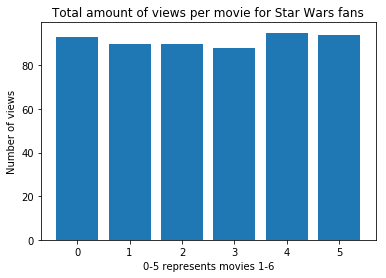

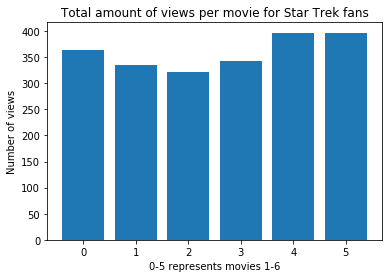

In [197]:
plt.bar(range(6), star_wars_fans.iloc[:, 3:9].sum())
plt.title("Total amount of views per movie for Star Wars fans")
plt.ylabel("Number of views")
plt.xlabel("0-5 represents movies 1-6")
plt.show()

plt.bar(range(6), star_trek_fans.iloc[:, 3:9].sum())
plt.title("Total amount of views per movie for Star Trek fans")
plt.ylabel("Number of views")
plt.xlabel("0-5 represents movies 1-6")
plt.show()

### Findings:

- Star Wars fans gave slightly better rankings for the newer movies than did the Star Trek fans, but not by much.
- Star War fans had more total views than the Star Trek fans, but not by much.

### Conclusion:

It looks like respondents prefer the "original" movies (4,5,6) over the newer movies. When I compared ranking and views across gender, age, education, and whether or not they were Star Wars or Star Trek fans, the results were basically the same. I did find a slightly better ranking among males and people 44+ - which makes sense given the genre and era of the movie. Also, Star Wars fans gave harsher (higher ranking scores) rankings for the newer movies than did the Star Trek fans, which isnt shocking given the general consensus.

In the end, the survey shows that Star Wars fans love "The Empire Strikes Back" most - and doesnt make a difference if you're a man or woman, old or young, or college educated.